# CHAPTER 0<font color = red>1


# 1.1	열전달이란 무엇이며 어떻게 전달되는가?

## -열전달이란?

>열전달(또는 열)은 온도차에 의한 열에너지 이동이다.

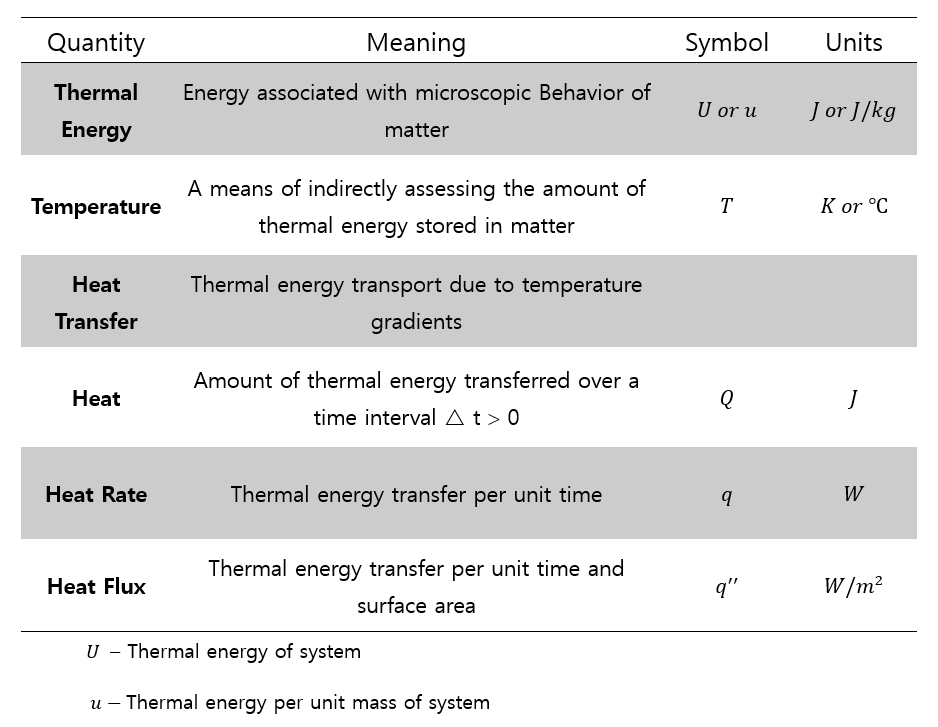

In [2]:
from sympy import *
from scipy.constants import pi, sigma
from scipy.optimize import newton
from scipy.optimize import fsolve


import numpy as np
import matplotlib.pyplot as plt


plt.style.use('seaborn-whitegrid')
init_printing(use_unicode=True)

'''
필요한 lib...
한번 run 시키고 넘어가야 아래서 다른 코드들이 작동한다.

'''


'\n필요한 lib...\n한번 run 시키고 넘어가야 아래서 다른 코드들이 작동한다.\n\n'

# **1.2물리적 근원과 전달률 방정식**

## -열전달 방식(mode)


><font color = red>전도(conduction) </font> : 구성 원자, 분자 및 전자의 random motion으로 인한 고체 또는 고정 유체(기체, 액체)에서의 열전달.

><font color = red>대류(convection) </font> : 표면 위의 유체 흐름에 대한 bulk and random motion 의 결합된 영향으로 인한 열전달.

><font color = red>복사(Radiation) </font>  : 원자, 분자의 전자배열의 변화로 인해 물질에서 방출되고 전자기파(또는 광자)로 전달되는 에너지.   
   


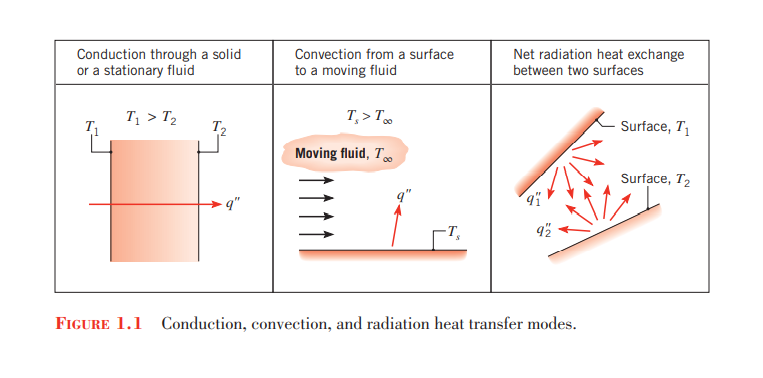</img>



- - -
### 참고 링크1. 전도, 대류 ,복사 개념 

https://www.youtube.com/watch?v=PpOTuy_xQdI

- - -

## 1.2.1 <font color = red>전도 (Conduction) 

### -Fourier’s law
    
<br>

**<p style = "font-size: 20px; line-height : 1.2em"> $$ q^{''}_{x} = -k*{dT \over dx} $$ </p>**

<center>$q{''}$ : Heat flux($W/m^2$), $\quad k$ : Thermal conductivity (W/m∙k)
    
<br>
    

>**온도분포가 선형적인 정상상태 조건 하에서 열전달률**

**<p style = "font-size: 20px; line-height : 1.2em"> $$ q^{''}_{x} = k{(T_1-T_2) \over L} = k * {\Delta T \over L} $$ </p>**
    

    

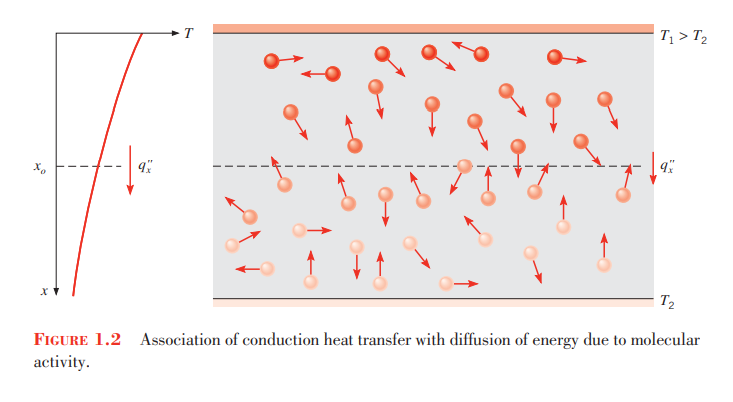



In [2]:
def Conduction(k,T1,T2,L, num = False):
    '''
    k ,T1 , T2 , L 값을 넣어주면 q를 알 수 있다.
    num = True 로 바꿔주면 식에 숫자를 넣어준다
    
    '''
    #q 구하기
    q = k*(T2-T1)/L

    #계산과정
    if num == True:
        k,T1,T2,L = symbols("{0} {1} {2} {3}".format(k,T1,T2,L))
        f = k*(T2-T1)/L
    
    else:
        k,T1,T2,L = symbols("k T1 T2 L")
        f = k*(T2-T1)/L

    return print("q = {0}".format(q),"식 : {0}".format(f))

Conduction(1,2,3,4)

q = 0.25 식 : k*(-T1 + T2)/L


## <font color = red>예제 1.1 </font>

**<p style = "font-size: 20px; line-height : 1.2em"> 어떤 공업용 가열로의 벽이 두께가 0.15m 이고, 열전도율이 1.7W/mK인 내화벽돌로 만들어져 있다. 정상상태에서 안쪽 표면과 바깥쪽 표면의 온도를 측정해 보니 각각 1400K 와 1150K 이다. 높이 0.5m, 폭1.2m인 한 측면 벽을 토한 열손실률은 얼마인가?</p>**

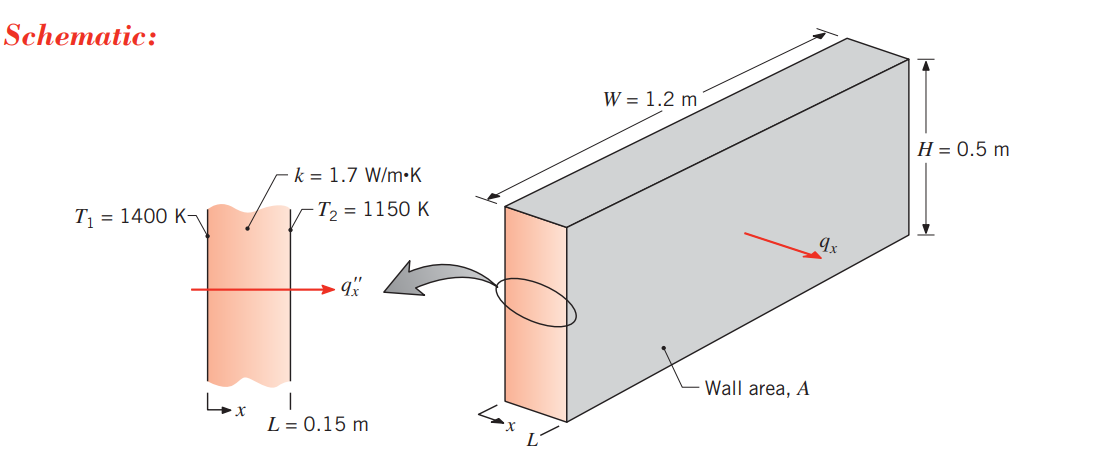

>**<p style = "font-size: 20px; line-height : 1.2em">가정 </p>**
>1. 정상상태 조건이다.
>2. 벽을 통한 1차원 전도이다.
>3. 열전도율은 일정하다.

**<p style = "font-size: 20px; line-height : 1.2em">열유속은 Fourier의 법칙으로부터 구할 수 있다.</p>**

**<p style = "font-size: 20px; line-height : 1.2em">$$ q{''}_x = k{\vartriangle T \over L} $$</p>**

In [3]:
"""
example 1-1
"""
'''
L = 0.15 #벽의 두께(m)
k = 1.7 #열전도율(W/m*k)
T1 = 1150 #안쪽 표면 온도(K)
T2 = 1400 #바깥쪽 표면 온도(K)
H = 0.5 #벽 높이(m)
W = 1.2 #벽 폭(m)

Conduction(k,T1,T2,L, num = False)

'''

Conduction(1.7,1150,1400,0.15, num = True)


q = 2833.3333333333335 식 : 1.7*(-1150 + 1400)/0.15


## 1.2.2<font color = red>대류(Convection)

    
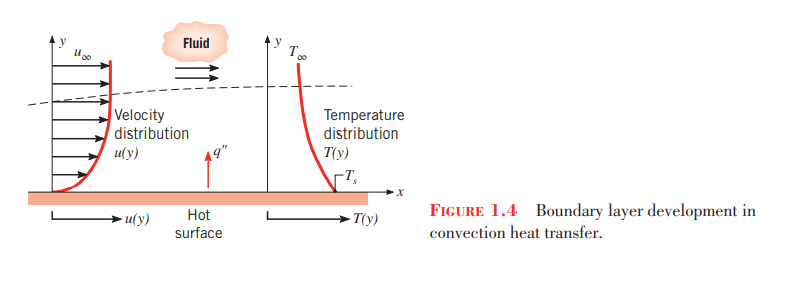
### -Newton’s law of cooling
**<p style = "font-size: 20px; line-height : 1.2em"> $$ q^{''}_{x} = h(T_{s} - T_{\infty}) $$ </p>**

<center>h - 대류 열전달계수(Convection heat transfer coefficient) ($W/m^2∙K$)
<center> $T_s$ - 표면 온도
<center> $T_{\infty}$ - 유체 온도
    
    
> **<font color = red>강제 대류(forced convection) </font>** : 외부 수단에 의해 유동이 발생되는 경우 
       
>  **<font color = red>자유, 자연 대류(natural or free convection) </font>**: 유체 내에서 온도변화에 의한 밀도차로부터 발생하는 부력에 의하여 흐름이 일어나는 경우   
    



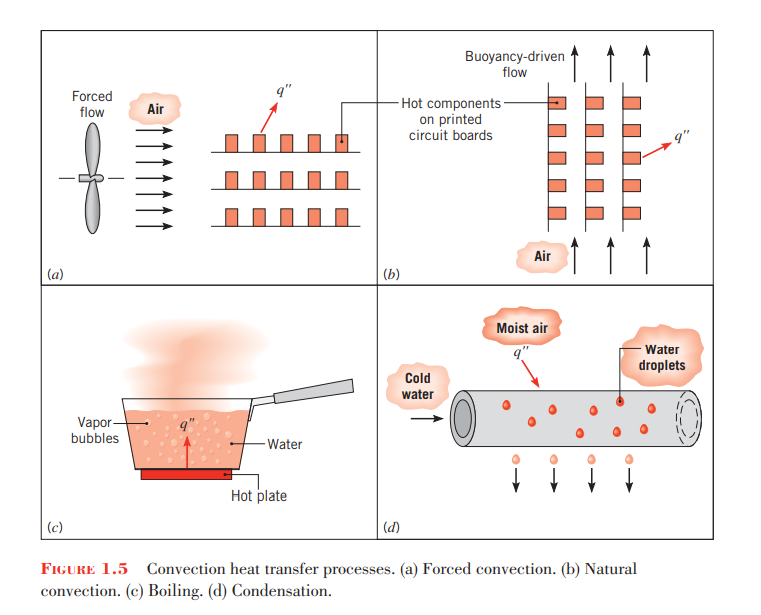</img>

In [4]:
def Convection(h, A ,T1, T2, num = False):
    '''
    
    h ,T1 , T2 , A 값을 넣어주면 q를 알 수 있다.
    num = True 로 바꿔주면 식에 숫자를 넣어준다
    
    
    '''

    q = h*A*(T2-T1)

        #계산과정
    if num == True:
        h,T1,T2,A = symbols("{0} {1} {2} {3}".format(h,T1,T2,A))
        f = h*A*(T2-T1)
    
    else:
        h,T1,T2,A = symbols("h T1 T2 A")
        f = h*A*(T2-T1)

    return print("q = {0}".format(q),"식 : {0}".format(f))

Convection(1,2,3,4)

q = 2 식 : A*h*(-T1 + T2)


## <font color = red>예제 1.2 </font>

**<p style = "font-size: 20px; line-height : 1.2em">단열되지 않은 증기 파이프가 공기와 벽의 온도가 $25^\circ C$인 방을 통과하고 있다. 파이프의 바깥지름은 70mm이고, 표면온도와 방사율은 각각 $200^\circ C$ 와 0.8이다. 표면 방사도와 조사는 얼마인가? 표면으로부터 공기로의 자연대류열전달계수가 15$W/m^2K$이라면, 파이프의 단위 길이당 표면으로부터의 열손실률은 얼마인가? </p>**

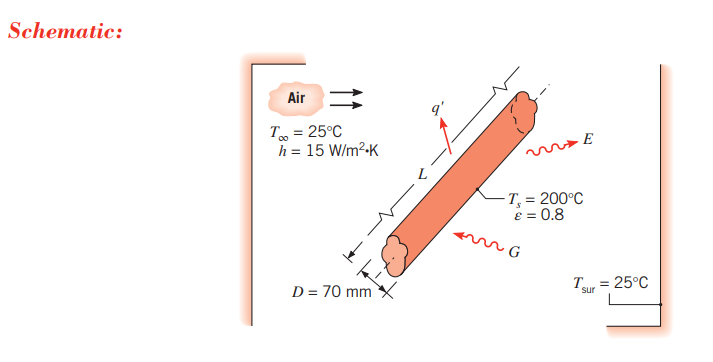 


>**<p style = "font-size: 20px; line-height : 1.2em">가정 </p>**
>1. 정상상태 조건이다.
>2. 파이프와 방 사이에서의 복사 열교환은 작은 표면과 그것을 둘러싸고 있는 훨씬 더 큰 표면 사이에서의 열교환이다.
>3. 표면 방사율과 흡수율은 같다.

In [5]:
"""
example 1-2
"""
'''
Ts = 파이프 표면 온도
epsilon = 파이프 방사율
L = 파이프 길이(m)
D = 파이프 바깥지름(m)
h = 자연대류 열전달계수(W/m^2*k)
sigma = Stefan-Boltzman 상수(W/m^2*k^4)
'''
pi = 3.14

Ts = 200
epsilon = 0.8
L = 1
D = 70e-3
Tinf = 25
Tsur = Tinf
h = 15
A = pi*D*L

**<p style = "font-size: 20px; line-height : 1.2em">표면 방사도</p>**

**<p style = "font-size: 20px; line-height : 1.2em">$$ E = \varepsilon \sigma T^4_{s} $$</p>**

**<p style = "font-size: 20px; line-height : 1.2em">조사</p>**

**<p style = "font-size: 20px; line-height : 1.2em">$$ G = \sigma T^4_{sur} $$</p>**

In [6]:
E = epsilon * sigma*((Ts+273)**4)
G = sigma*(Tsur**4)
print('E [W/m^2] : ',E)
print('G [W/m^2] : ',G)

E [W/m^2] :  2270.629555745998
G [W/m^2] :  0.02214990007421875


**<p style = "font-size: 20px; line-height : 1.2em">파이프로부터의 열손실은 방 안 공기로 대류에 의한 것과 벽과 복사 열교환에 의한 것이다. </p>**

**<p style = "font-size: 20px; line-height : 1.2em">따라서 q = $q_{conv} + q_{rad}$이다.</p>**
    
**<p style = "font-size: 20px; line-height : 1.2em">$$q_{conv} = hA(T_s - T_{\infty}) $$</p>**

**<p style = "font-size: 20px; line-height : 1.2em">$$q_{rad} = \varepsilon A \sigma(T_s^4 - T_{sur}^4) $$</p>**

**<p style = "font-size: 20px; line-height : 1.2em">$$q =  hA(T_s - T_{\infty})+  \varepsilon A \sigma(T_s^4 - T_{sur}^4)$$</p>**

**<p style = "font-size: 20px; line-height : 1.2em">단위길이당 열손실</p>**
**<p style = "font-size: 20px; line-height : 1.2em">$$q{'} = {q\over L}$$</p>**

In [7]:
qh = h*A*(Ts - Tinf)

sigma = 5.67e-8
qr = epsilon*sigma*A*((Ts+273)**4 - (Tsur+273)**4)

q = qh + qr

print('total heat transfer, W       : ', q)
print('단위길이당 열손실, W/m       : ', q/L)

total heat transfer, W       :  997.4004923691733
단위길이당 열손실, W/m       :  997.4004923691733


## 1.2.3<font color = red>복사(Radiation)

* 표면에서 방사된 복사는 표면 내부에 있는 물질의 열에너지로부터 발생하며,   
  단위면적당 방출된 에너지율을 표면의 <font color = red>**방사도(emissive power) E [$W/m^2$]**</font>라 한다.

### -Stefan-Boltzmann 법칙

**<p style = "font-size: 20px; line-height : 1.2em"> $$E_{b} = \sigma T^{4}_{s}$$</p>**

<center>$T_s$- 표면의 절대온(K) </center>
<center>σ- Stefan-Boltzmann 상수(σ=5.67 × 10^(-8)  $W/m^2∙K^4$  ) </center>

> 이러한 표면을 이상적인 **복사체 또는 흑체(blackbody)**라 한다.
    
    
**<p style = "font-size: 20px; line-height : 1.2em"> 실제 표면</p>**

**<p style = "font-size: 20px; line-height : 1.2em"> $$E = \epsilon \sigma T^{4}_{s}$$</p>**
   <center>ε- 방사율(emissivity) (0≤ε≤1)</center>
   
   
-------

* 복사는 또한 주위로부터 표면에 입사 될 수도 있다.   
  표면의 단위 면적에 입사하는 모든 복사율을 <font color = red>**조사(irradiation) G [$W/m^2$]**</font>라 한다.   
 


**<p style = "font-size: 20px; line-height : 1.2em">$$G_{abs} = \alpha G$$</p>**
 <center> G_{abs} : Absorbed incident radiation </center>
 <center>α- 흡수율(absorptivity) (0≤α≤1) </center> 
 
 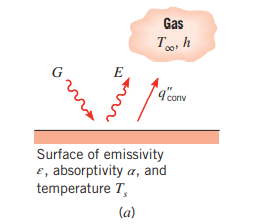</img>

### -Special case 
    
>작은 표면과 그것을 완전히 둘러싸고 있는 훨씬 큰 등온 표면 사이에서 복사 열교환이 일어나는 특별한 경우


**<p style = "font-size: 20px; line-height : 1.2em"> $$G = G_{sur} =  \sigma T^4_{sur} $$ </p>**

### -정미(net) 복사 열전달률
>작은 표면이 α= ε 인 회체표면(gray surface)이라고 가정


**<p style = "font-size: 20px; line-height : 1.2em"> $$ q^{''}_{rad} = {q \over A} = \varepsilon E_{b}(T_{s}) - \alpha G = \varepsilon \sigma (T_{s}^{4} - T_{sur}^{4})$$</p>**

<br>

><p style = "font-size: 15px; line-height : 1.2em">정미 복사 열교환을 다음식의 형태로 나타내는 것이 편리하다.</p>
 <p style = "font-size: 15px; line-height : 1.2em">$q_{rad} = h_rA(T_{s} - T_{sur})$</p>
> <p style = "font-size: 15px; line-height : 1.2em">복사열전달계수 $h_r \equiv \varepsilon  \sigma(T_{s} + T_{sur})(T_{s}^2 + T_{sur}^2)$</p>

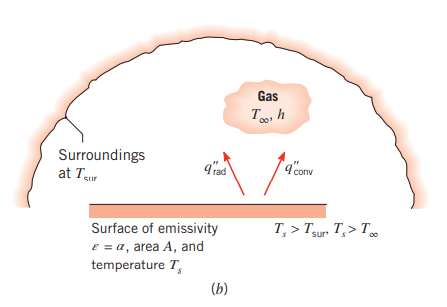

In [8]:
def Radiation(ep , Ts ,Tsur , num = False):
    '''
    
    '''
    sigma = 5.67e-8
    q = ep*sigma*(Ts**4 - Tsur**4)

    #계산과정
    if num == True:
        ep,Ts,Tsur = symbols("{0} {1} {2}".format(ep, Ts,Tsur))
        f = ep*sigma*(Ts**4 - Tsur**4)
    
    else:
        ep,Ts,Tsur = symbols("ep Ts Tsur")
        f = ep*sigma*(Ts**4 - Tsur**4)

    return print("q = {0}".format(q),"식 : {0}".format(f))

Radiation(1,2,3)

q = -3.6854999999999997e-06 식 : 5.67e-8*ep*(Ts**4 - Tsur**4)


# 1.3 열역학과의 관계
     
## 1.3.1 열역학 제 1법칙(에너지보존)과의 관계
     
**<p style = "font-size: 17px; line-height : 1.2em"> 밀폐계(물질의 출입이 없는 계) 대해서는 경계를 통한 열전달과 계가 하거나 받는 일의 두가지만 존재한다. </p>**
**<p style = "font-size: 17px; line-height : 1.2em">이로인해 제 1법칙은 다음 식과 같다.</p>**
<br>

**<p style = "font-size: 20px; line-height : 1.2em"> -검사체적과 밀폐계에 대한 제1법칙</p>**

**<p style = "font-size: 20px; line-height : 1.2em"> $$\Delta E^{tot}_{st} = Q - W $$</p>**

<br>

**<p style = "font-size: 15px; line-height : 1.2em"> (계 내에 저장된 총에너지 변화량, Q는 계로 전달된 정미 열이며, W는 계에 의해 행해진 정미 일이다.)</p>**

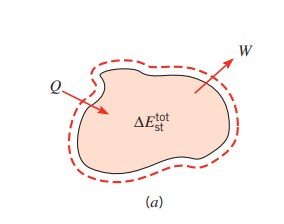

**<p style = "font-size: 18px; line-height : 1.2em; color:red">1. 총에너지보존 : 시간 간격($\Delta t$)에 걸친 열역학 제1법칙</p>**

<br>


**<p style = "font-size: 18px; line-height : 1.2em">검사체적 내에 저장된 에너지의 증가량은 검사체적에 들어간 에너지 양에서 검사체적을 나간 에너지 양을 뺀 것과 같아야 한다.</p>**

<br>


**<p style = "font-size: 18px; line-height : 1.2em; color:red">2. 시간 간격($\Delta t$)에 걸친 열 및 역학적에너지보존</p>**

<br>


**<p style = "font-size: 18px; line-height : 1.2em">검사체적 내에 저장된 열 및 역학적에너지의 증가량은 검사체적에 들어간 열 및 역학적에너지 양에서 검사체적으로부터 나간 열 및 역학적에너지 양을 빼고, 검사체적 내에서 발생된 열에너지 양을 더한 것과 같아야 한다.</p>**

<br>

**<p style = "font-size: 18px; line-height : 1.2em; color:red">3. 임의의 순간(t)에서의 열 및 역학적에너지보존</p>**

<br>


**<p style = "font-size: 18px; line-height : 1.2em">검사체적 내에 저장된 열 및 역학적에너지의 증가율은 검사체적에 들어간 열 및 역학적에너지율에서 검사체적으로부터 나간 열 및 역학적에너지율을 빼고, 검사체적 내에서 발생된 열에너지율을 더한 것과 같아야 한다.</p>**

<br>

**<p style = "font-size: 18px; line-height : 1.2em">$$ \dot{E_{st}} = {dE_{st}\over dt} = \dot{E_{in}} - \dot{E_{out}} + \dot{E_{g}}$$</p>**

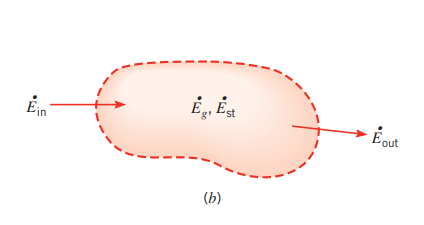


## <font color = red>예제 1.3 </font>

**<p style = "font-size: 20px; line-height : 1.2em">한 풍력 터빈의 날개가 비교적 느린 속도로 큰 축을 회전시킨다. 회전속도는 $\eta_gb $ = 0.93의 효율로 전기 발전기를 구동시킨다. 기어박스, 발전기 그리고 관련 장비를 포함하고 있는 실린더형 [나셀(nacelle)](https://en.wikipedia.org/wiki/Nacelle)의 길이는 L = 60m, 지름은 D = 3m이다. 터빈이 P = 2.5MW의 전력을 생산하고, 공기 온도와 주위 온도가 각각 $T_{\infty} = 25^\circ C$ 와 $T_{sur} = 20^\circ C$라고 할때, 나셀 내부의 최소 작동 가능 온도를 구하라. 나셀의 방사율은 $ \varepsilon = 0.83 $이며 대류열전달계수는 h = 35$W/m^2K$이다. 날개 허브에 인접해 있는 나셀 표면은 단열 상태로 볼 수 있으며, 태양 복사는 무시한다.</p>**

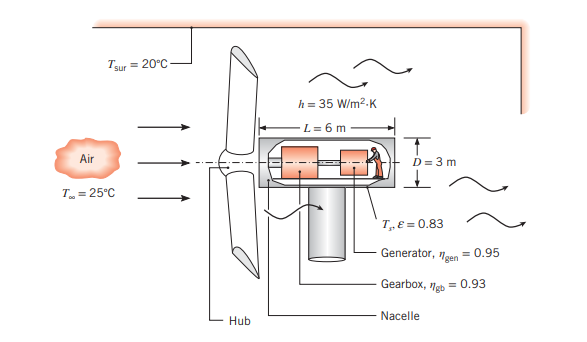

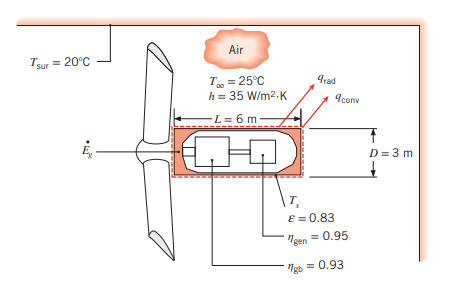

>**<p style = "font-size: 20px; line-height : 1.2em">가정 </p>**
>1. 정상상태 조건이다.
>2. 크 주위 공간이다.
>3. 날개 허브에 닿아 있는 나셀 표면은 단열되어 있다.

In [9]:
"""
example 1-3

eta_gb = 기어박스 효율
eta_gen = 발전기 효율
L = 나셀(nacelle) 길이(m)
D = 나셀(nacelle) 지름(m)
Tinf = 공기온도(℃)
h = 대류열전달계수(W/m^2*k)
Tsur = 주위온도(℃)
epsilon = 나셀(nacelle) 방사율
P = 전력(W)

"""


eta_gb, eta_gen = 0.93, 0.95
L, D = 6, 3
Tinf, h = 25, 35
Tsur = 20
epsilon = 0.83

P = 2.5e6
q = P*(1/(eta_gb*eta_gen) - 1)
A = pi*D*L + pi*D**2/4

def fun(T):
    qh = h*A*(T - Tinf)
    qr = sigma*epsilon*A*((T + 273.15)**4 - (Tsur + 273.15)**4)
    return q - (qh + qr)

T = newton(fun, 50)

print(T)

142.80625391888015


## <font color = red>예제 1.6 </font>

**<p style = "font-size: 20px; line-height : 1.2em">사람은 넓은 범위의 환경조건 하에서 거의 일정한 중심 온도 $T_c = 37^\circ C$를 유지하기 위하여 열생성률과 열손실률을 조절 할 수 있다. 이 과정을 체온조절(thermoregulation)이라 한다. 인체와 주위 사이의 열전달을 계산하는 관점에서, 한 층의 피부(skin)와 지방(fat)층에 초점을 두어, 바깥 표면은 주위에 노출되고 안쪽 표면은 중심 온도보다 약간 낮은 온도 $T_i = 35^\circ C$ = 308K를 갖는다고 한다. 두께가 L = 3mm이고 유효 열전도율 k = 0.3 W/mK인피부/지방층을 갖는 사람을 고려한다. 그 사람은 표면적 A = 18 $m^2$이고 목욕 옷을 입고 있다. 피부의 방사율은 $\varepsilon = 0.95$이다.</p>**

<br>

**<p style = "font-size: 20px; line-height : 1.2em">1. 사람이 $T_{\infty} = 297K$인 고요한 공기 중에 있을 때 피부 표면온도와 주위로의 열손실률은 얼마인가? 공기로의 대류열전달 특성은 h = 2$W/m^2K$ 인 자연대류계수로 나타낸다.</p>**

<br>

**<p style = "font-size: 20px; line-height : 1.2em">2. 사람이 $T_{\infty} = 297K$인 물 속에 있을 때 피부 표면온도와 주위로의 열손실률은 얼마인가? 물로의 대류열전달 특성은 h = 200 $W/m^2K$ 인 자연대류계수로 나타낸다.</p>**


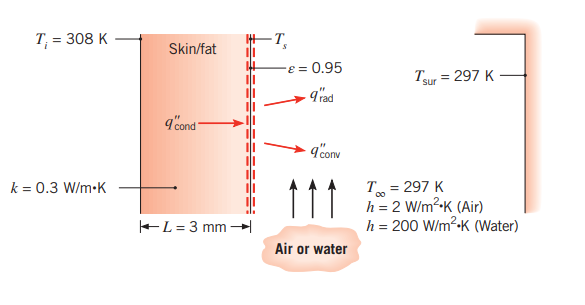


>**<p style = "font-size: 20px; line-height : 1.2em">가정 </p>**
>1. 정상상태 조건이다.
>2. 피부/지방층을 통한 1차원 전도 열전달이다.
>3. 열전도율은 균일하다.

In [3]:
"""
example 1-6


Ti = 안쪽 표면 온도(K)
L = 피부/지방츨 두께(m)
k = 열전도율(W/m*k)
A = 표면적(m^2)
epsilon = 피부 방사율

# air
Tinf = 공기 온도(K)
Tsur = Tinf
h = 공기 대류열전달계수(W/m^2*k)

# water
Tinf = 물 속 온도(K)
Tsur = Tinf
h = 물 대류열전달계수(W/m^2*k)

"""

Ti = 308
L = 3e-3
k = 0.3
A = 1.8
epsilon = 0.95


**<p style = "font-size: 20px; line-height : 1.2em">피부 표면에서 에너지 평형</p>**


**<p style = "font-size: 20px; line-height : 1.2em">$$\dot E_{in} - \dot E_{out} = 0 $$</p>**
<br>

**<p style = "font-size: 20px; line-height : 1.2em">단위면적을 기준으로 하면 다음과 같이 된다.</p>**


**<p style = "font-size: 20px; line-height : 1.2em">$$q{''}_{cond} - q{''}_{conv} - q{''}_{rad} = 0 $$</p>**

<br>

**<p style = "font-size: 20px; line-height : 1.2em">각각 해당하는 전도, 대류, 복사 열유속 식을 대입하면</p>**


**<p style = "font-size: 20px; line-height : 1.2em">$$ k{T_i - T_s \over L} = h(T_s - T_{\infty}) + \varepsilon\sigma(T^4_{s} - T^4_{sur}) $$</p>**



In [5]:
# air
Tinf = 297
Tsur = 297
h = 2

def fun(T):
    qk = k*(Ti - T)/L    
    qh = h*(T - Tinf)
    qr = epsilon*sigma*(T**4 - Tsur**4)
    return qk - (qh + qr)
T = newton(fun, 280)

print('air')
print('skin temp., C : {:10.2f}'.format(T - 273))

air
skin temp., C :      34.19


**<p style = "font-size: 20px; line-height : 1.2em">액체 물은 열복사에 대한 불투과제이므로 피부표면으로부터의 열손실은 오직 대류에 의한 것이다.</p>**

In [6]:
# water
Tinf = 297
Tsur = 297
h = 200

def fun(T):
    qk = k*(Ti - T)/L    
    qh = h*(T - Tinf)
    qr = 0
    return qk - (qh + qr)
T = newton(fun, 280)
q = k*A*(Ti - T)/L    

print('\nwater')
print('skin temp., C : {:10.2f}'.format(T - 273))
print('total, W      : {:10.2f}'.format(q))


water
skin temp., C :      27.67
total, W      :    1320.00


## 1.3.2 열역학 제 2법칙과 열기관효율 사이의 관계

>열역학 제 2법칙은 효율이 주요 관심대상일 때 언급되며, 같은 의미라도 다른 여러방법으로 표현될수 있다.

<br>

**<p style = "font-size: 20px; line-height : 1.2em">Kelvin-Planck 서술</p>**

**<p style = "font-size: 16px; line-height : 1.2em">열역학적 사이클로 작동되면서 단일 열저장조로부터 열전달에 의해 받은 열에너지를 모두 일로 변환시켜 주위로 전달하는 그 어떤 시스템도 존재할 수 없다.</p>**

<br>

**<p style = "font-size: 20px; line-height : 1.2em">-열기관의 효율</p>**

**<p style = "font-size: 20px; line-height : 1.2em">$$\eta \equiv {W \over Q_{in}} = {(Q_{in} -Q_{out})\over Q_{in}} = 1 - {Q{out} \over Q_{in}}$$ </p>**

<br>

**<p style = "font-size: 20px; line-height : 1.2em">-가역과정으로 작동되는 효율인 카르노 효율 </p>**


**<p style = "font-size: 20px; line-height : 1.2em">$$\eta_{c} = 1 - {T_{c}\over T_{h}} $$</p>**

<br>

>카르노 효율은 두 온도 사이에서 작동하는 어떤 열기관이 달성할 수 있는 최대효율이다. 실제 열기관은 비가역 과정에서 작동할 수 밖에 없으므로 더 낮은 효율을 가질 것이다. 
     
**<p style = "font-size: 20px; line-height : 1.2em">-실제 열전달과정(비가역)을 고려한 수정효율</p>**

**<p style = "font-size: 20px; line-height : 1.2em">$$\eta_{m} = 1 - {Q_{out}\over Q_{in}} = 1 - {q_{out} \over q_{in}} = 1 - {T_{c,i}\over T_{h,i}}$$</p>**

>어떤 시간 간격 동안에 걸친 열 유동의 비율 $Q_{out}/Q_{in}$은 이에 대응하는 열전달률의 비 $q_{out}/q_{in}$로 대체된다.

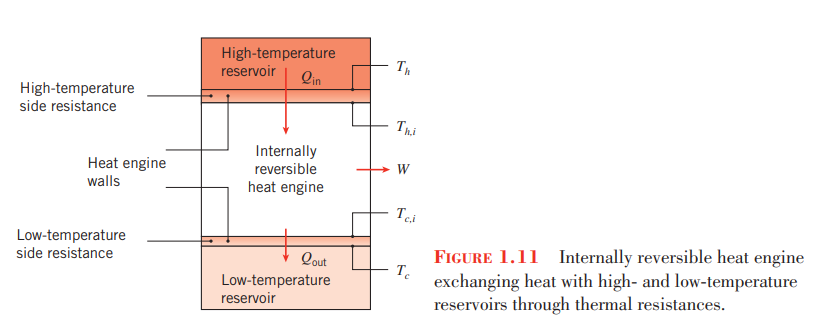

<br>

**<p style = "font-size: 20px; line-height : 1.2em">-열저항의 정의를 이용한 열기관 내외로의 열전달률</p>**


**<p style = "font-size: 20px; line-height : 1.2em">$$q_{in} = (T_{h}-T_{h,i})/R_{t,h}$$</p>**

**<p style = "font-size: 20px; line-height : 1.2em">$$q_{out} = (T_{c,i}-T_{c})/R_{t,c}$$</p>**

<br>

**<p style = "font-size: 20px; line-height : 1.2em">-식정리를 통한 좀 더 실제적인 수정효율</p>**

**<p style = "font-size: 20px; line-height : 1.2em">$$\eta_{m} = 1 - {T_{c}\over (T_{h} - q_{in}R_{tot})} $$</p>**
> 여기서 $R_{tot} = R_{t,h} + R_{t,c} $

<br>

**<p style = "font-size: 20px; line-height : 1.2em">-열기관의 출력</p>**

**<p style = "font-size: 20px; line-height : 1.2em">$$\dot{W} = q_{in}\eta_{m} = q_{in}\left[1-{T_{c} \over (T_{h} - q_{in}R_{tot})}\right]$$</p>**


## <font color = red>예제 1.7</font>

**<p style = "font-size: 20px; line-height : 1.2em">대형 증기 원동소에서, 석탄의 연소를 통한 열 발생률이 $q_{in} = 2500 MW $ 이고 , 이때 화염 온도가 $T_h = 100K$로 흐르는 강으로 배출된다. 열은 연소 생성물로부터 보일러의 큰 관 외부로 복사와 대류에 의해전달된다. 이때 보일러 관을 통해 전도가 일어나며, 관 내부로부터 작동 유체(물)로 대류가 일어난다. 저온부에서는 외부 응축기 관 표면에서 증기의 응축이 일어나 열이 원동소로부터 방출되며, 응축기 관 벽을 통해 전도가 일어나고, 응축기관 내부로부터 강물로 대류가 일어난다. 전도, 대류 및 복사가 복합된 효과를 고려한 고온부와 저온부에서의 열저항은 설계조건하에서 각각 $R_{t,h} = 8 X 10^{-8} K/W$와 $R_{t,c} = 2 X 10^{-8} K/W$이다.</p>**

**<p style = "font-size: 20px; line-height : 1.2em">1.저온 열저장조와 고온 열저장조와의 열전달 효과를 고려해 원동소의 효율과 출력을 계산하라. 원동소를 내부적으로 가역 열기관으로 취급하라.</p>**

**<p style = "font-size: 20px; line-height : 1.2em">2.시간이 지나면, 연소가 일어난 부분의 보일러 관에 석탄 슬래그(slag)가 축적될 것이다. 이러한 [파울링 과정(fouling process)](https://en.wikipedia.org/wiki/Fouling)으로 인해 고온부의 열저항은 $R_{t,h} = 9 X 10^{-8} K/W$로 증가한다. 동시에,생물학적 물질들이 응축기 관의 강물 쪽에 축적되어, 저온부의 열저항을 $R_{t,c} = 2 X 10^{-8} K/W$로 증가시킨다. 이러한 오염된 상태하에서 원동소의 효율과 출력을 구하라.</p>**


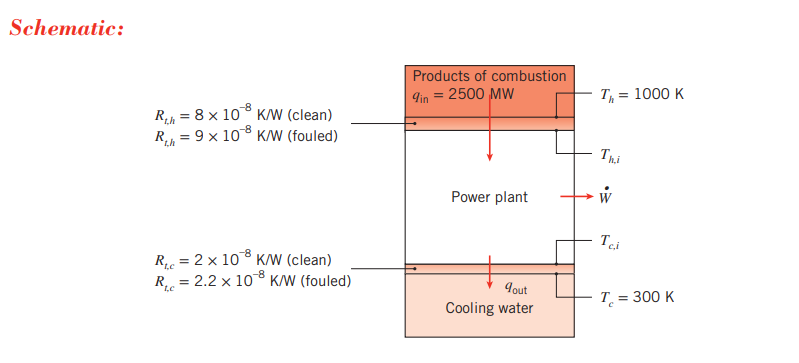

>**<p style = "font-size: 20px; line-height : 1.2em">가정 </p>**
>1. 정상상태 조건이다.
>2. 원동소는 내부 가역적 열기관으로 작동한다. 따라서 효율은 수정 효율이다.

In [7]:
"""
example 1-7

qin = 석탄의 연소를 통한 열 발생률(W)
Th = 화염 온도(K)
Tc = 강 온도(K)

"""
qin = 2500e6
Th, Tc = 1000, 300

**<p style = "font-size: 20px; line-height : 1.2em">1. 내부가역적인 원동소의 수정 효율</p>**

**<p style = "font-size: 20px; line-height : 1.2em">$$\eta_{m} = 1 - {T_{c}\over (T_{h} - q_{in}R_{tot})} $$</p>**

**<p style = "font-size: 20px; line-height : 1.2em">출력</p>**

**<p style = "font-size: 20px; line-height : 1.2em">$$ \dot W = q_{in} \eta_m $$</p>**


In [21]:
Rh, Rc = 8e-8, 2e-8 # 깨끗한 상태
Rtot = Rh + Rc

eta = 1 - Tc/(Th - qin*Rtot)

W = qin*eta

print('수정 효율 [%]: ',eta*100)
print('출력 [W] : ', W)

수정 효율 [%]:  60.0
출력 [W] :  1500000000.0


In [23]:
Rh, Rc = 9e-8, 2.2e-8 # 오염된 상태
Rtot = Rh + Rc

eta = 1 - Tc/(Th - qin*Rtot)

W = qin*eta

print('수정 효율 [%]: ',eta*100)
print('출력 [W] : ', W)

수정 효율 [%]:  58.33333333333333
출력 [W] :  1458333333.3333333


## <font color = red>예제 1.8</font>

**<p style = "font-size: 20px; line-height : 1.2em">$200W/m^2$의 균일한 조사를 공급하는 적외선 램프에 노출시켜서 평판위의 도장을 경화시킨다. 이 도장은 조사의 80%를 흡수하고 방사율이 0.50이다. 이것은 또한 온도가 각각 $20^\circ C$와 $30^\circ C$인 공기 흐름과 큰 주위에 노출되어 있다.</p>**

**<p style = "font-size: 20px; line-height : 1.2em">1.평판과 대기 사이의 대류열전달계수가 $15W/m^2K$이라면, 평판의 경화온도는 몇 도인가?</p>**

<br>

**<p style = "font-size: 20px; line-height : 1.2em">2.마모와 내구성을 포함하는 도장의 최종특성은 경화가 일어나는 온도에 의존한다고 알려져 있다. 공기 유동 장치로 경화된 표면 위에서 공기 속도와 대류열전달계수를 제어할 수 있으나, 프로세스 기술자는 온도가 대류열전달계수에 어떻게 의존하는가를 알아야 한다. $2 \le h \le 200 W/m^2K$에 대하여 표면온도를 h의 함수로 계산하고 도표로 나타내어 원하는 정보를 제시하라. 경화온도가 $50^\circ C$일 때 h의 값을 구하라.</p>**


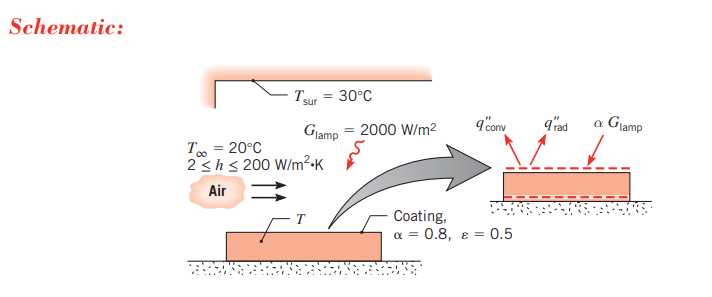

>**<p style = "font-size: 20px; line-height : 1.2em">가정 </p>**
>1. 정상상태 조건이다.
>2. 평판의 뒤 표면으로의 열손실은 무시한다.
>3. 평판은 큰 주위 안에 있는 작은 물체이고, 도장은 주위로부터의 조사에 대하여 $\alpha_{sur} = \varepsilon = 0.5$의 흡수율을 갖는다.

In [24]:
'''
example 1-8

G = 조사(irradiation)
alpha = 
epsilon = 방사율
Tsur = 
Tinf = 


'''
G = 2000 # irradiation
alpha = 0.8
epsilon = 0.5
Tsur = 30 + 273
Tinf = 20 + 273

**<p style = "font-size: 18px; line-height : 1.2em">$$ \dot{E_{st}} = {dE_{st}\over dt} = \dot{E_{in}} - \dot{E_{out}} + \dot{E_{g}}$$</p>**

> 내부에너지 발생이 없음 $\dot E_{g} = 0$
<br>
> 정상상태 조건 $ \dot{E_{st}} = 0$

**<p style = "font-size: 20px; line-height : 1.2em">$$\dot E_{in} - \dot E_{out} = 0 $$</p>**


**<p style = "font-size: 20px; line-height : 1.2em">도장에 의한 램프 조사의 흡수로 인한 유입 에너지와, 주위로의 대류와 정미 복사 열전달에 의한 유출 에너지를 고려하면 다음과 같이된다.</p>**

**<p style = "font-size: 20px; line-height : 1.2em">$$(\alpha G)_{lamp} - q{''}_{conv} - q{''}_{rad} = 0 $$</p>**

**<p style = "font-size: 20px; line-height : 1.2em">$$\Downarrow$$</p>**

**<p style = "font-size: 20px; line-height : 1.2em">$$ (\alpha G)_{lamp} - h(T - T_{\infty}) - \varepsilon\sigma(T^4 - T^4_{sur}) = 0 $$</p>**

In [26]:
# 1
h = 15

def fun(T, h):    
    qh = h*(T - Tinf)
    qr = sigma*epsilon*(T**4 - Tsur**4)
    return alpha*G - (qh + qr)

T = newton(lambda T: fun(T, h), 400)
print('temp [C] : {:10.2f}'.format(T - 273))


temp [C] :     104.30


hsafe :      51.01


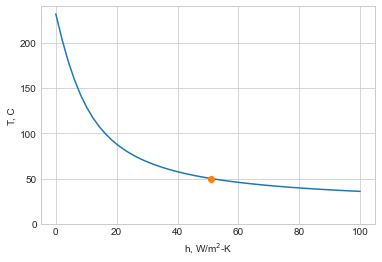

In [27]:
# 2
h = np.linspace(0, 100)
T = np.array([newton(lambda T: fun(T,h1), 300) for h1 in h])
plt.plot(h, T-273)
plt.ylim([0,240])
plt.xlabel(r'h, W/m$^2$-K')    
plt.ylabel('T, C')

Tsafe = 50 + 273    
hsafe = newton(lambda h: fun(Tsafe,h), 50)
print('hsafe : {:10.2f}'.format(hsafe))
plt.plot(hsafe, Tsafe-273, 'o')
plt.show()

## 1.4 단위와 차원

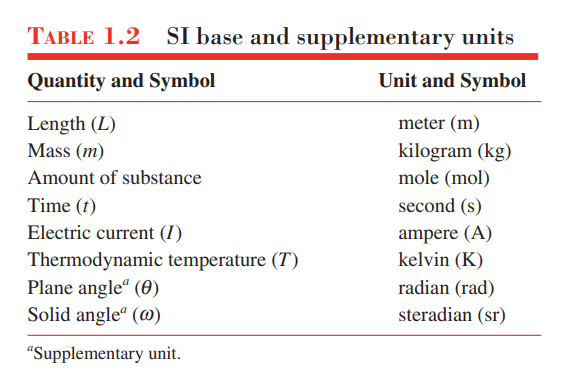

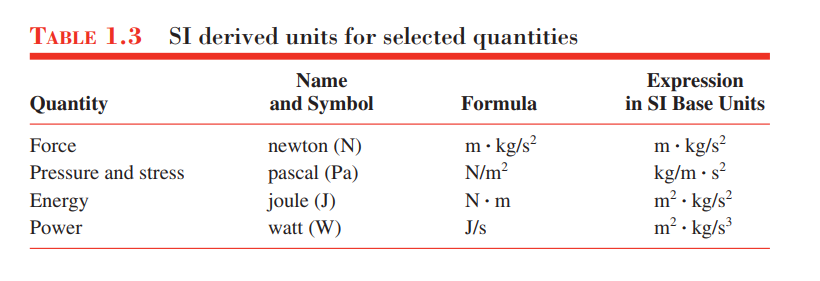

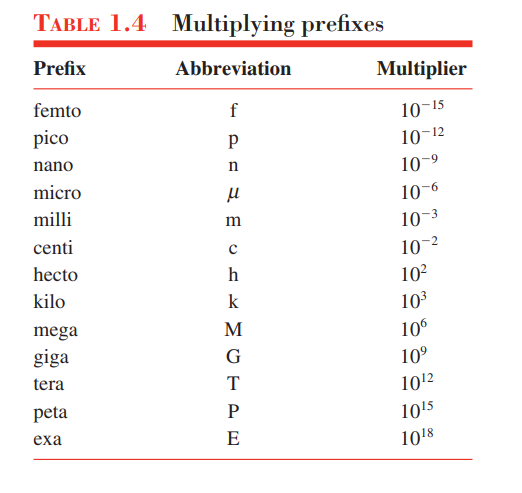